In [27]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [28]:
with open(f'dataframes/{4}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.756676e+09,1.756676e+09,"[228.39, 91.82, 91.74, 91.44, 91.21, 91.74, 91...",775,1,5
1,Tag2,Tag1,1.756676e+09,1.756676e+09,"[234.87, 8.81, 8.66, 8.89, 9.27, 8.74, 8.74, 8...",775,1,5
2,Tag1,Tag2,1.756676e+09,1.756676e+09,"[91.44, 143.4, 143.7, 144.01, 143.93, 143.85, ...",785,1,5
3,Tag2,Tag1,1.756676e+09,1.756676e+09,"[8.89, 11.71, 11.64, 11.71, 11.64, 11.71, 11.6...",785,1,5
4,Tag1,Tag2,1.756676e+09,1.756676e+09,"[143.78, 80.61, 80.76, 80.53, 80.99, 80.83, 81...",795,1,5


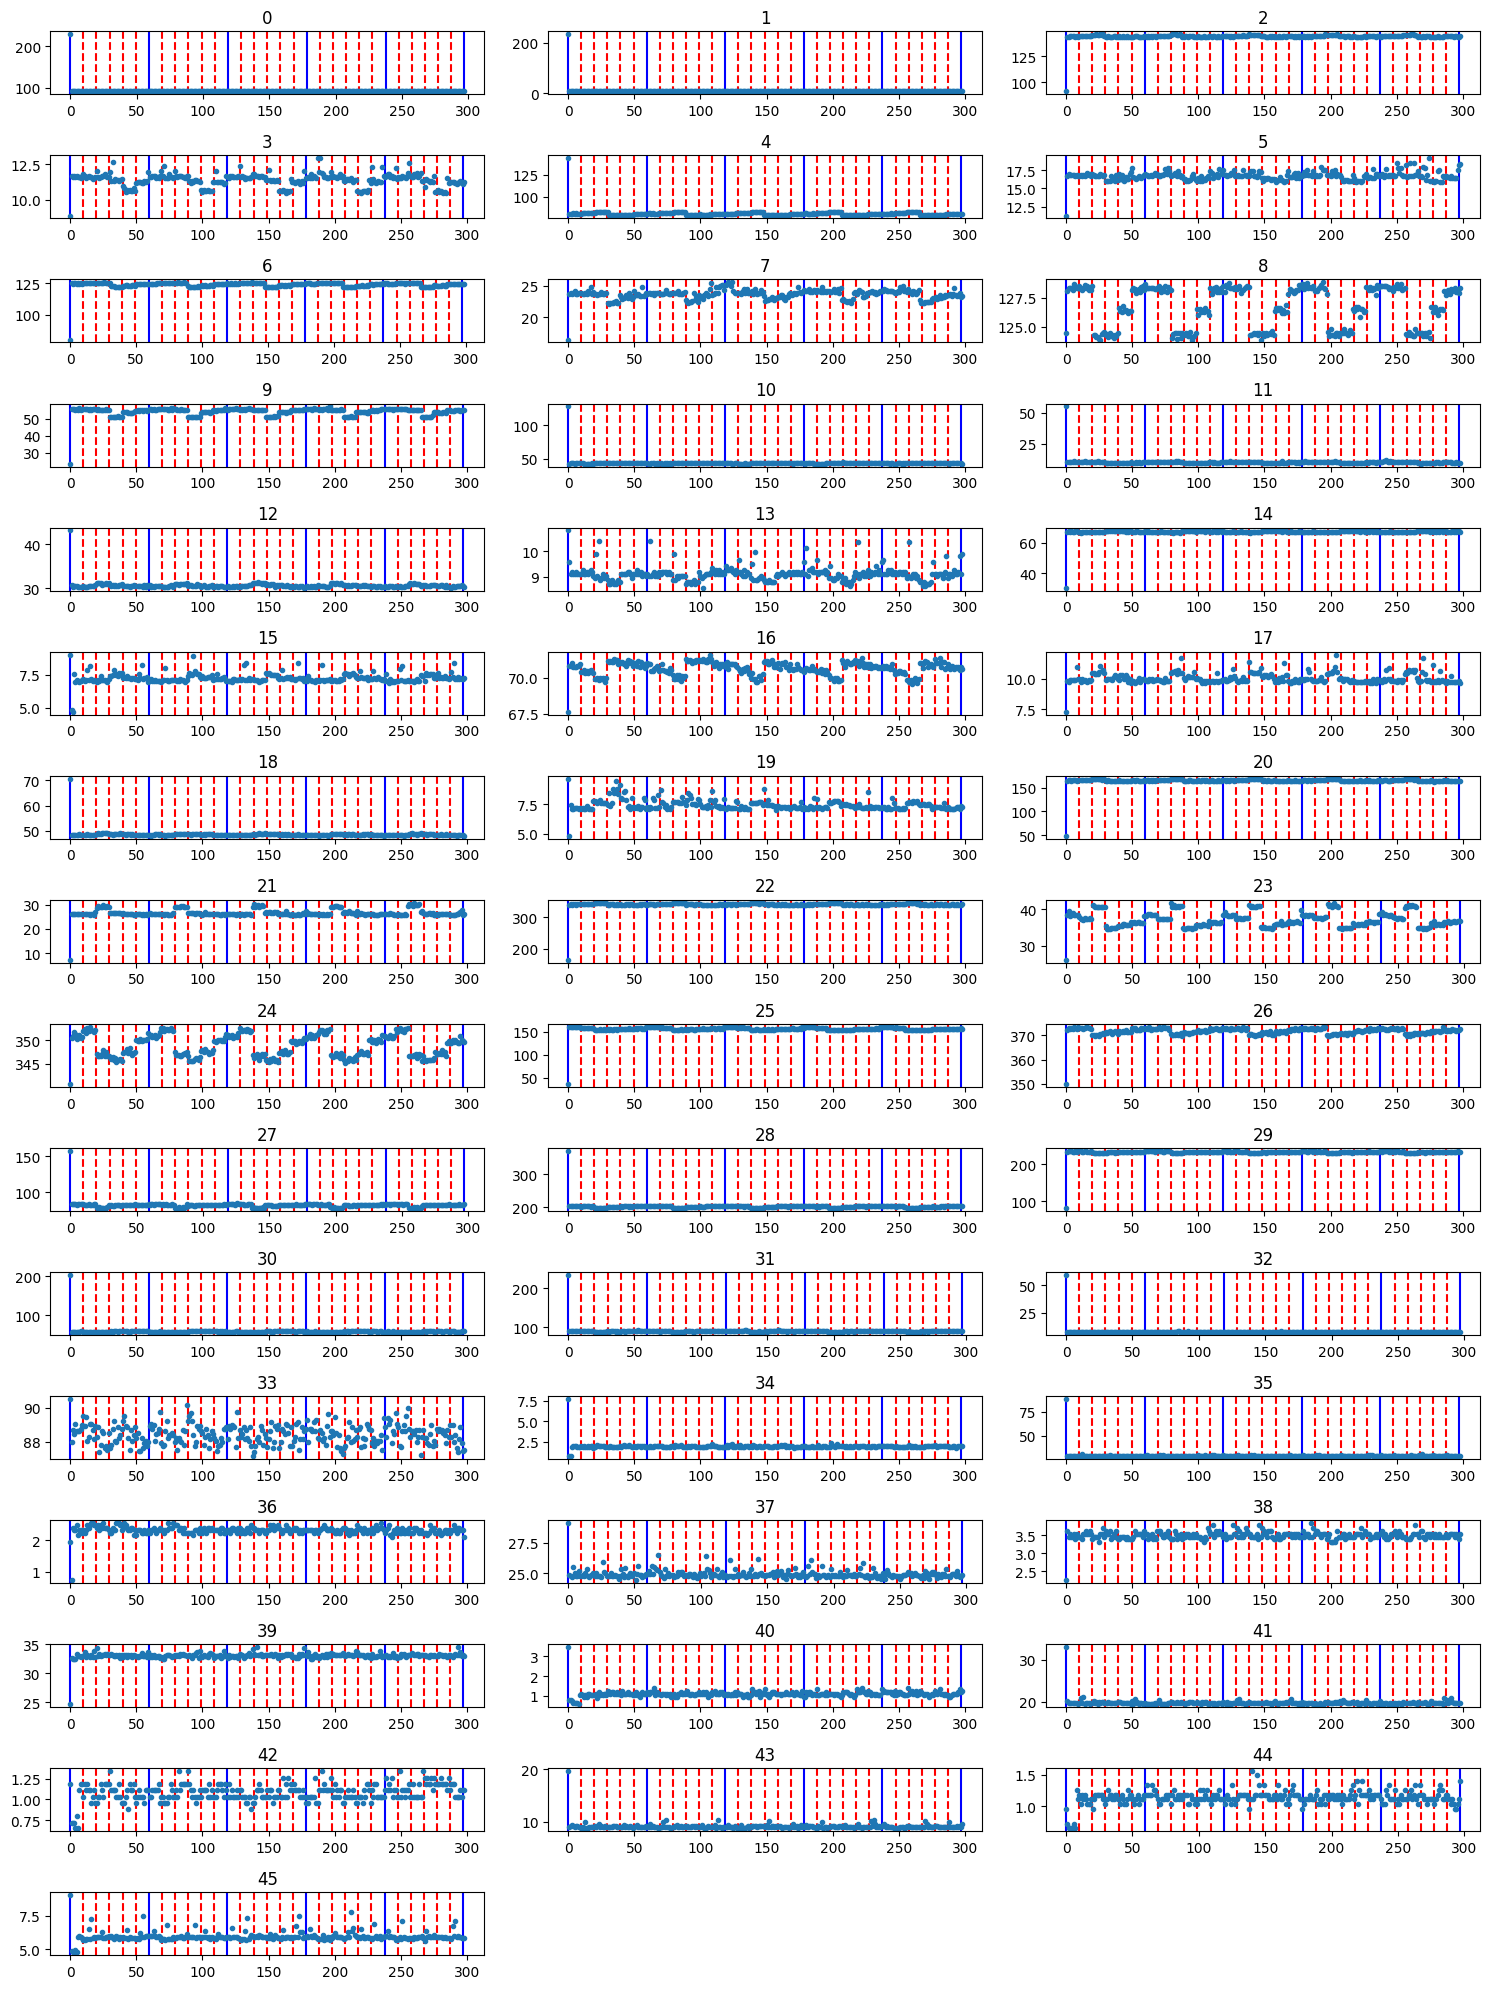

In [29]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=df.iloc[0]['NumMPPs']
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(15,20))
for df_idx in range(len(df)):

    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    bad=False
    for k in phase_medians.keys():
        assert(len(phase_medians[k])==num_mpps)
        if np.std(phase_medians[k])>1:
            print(f"Bad data found at {df_idx} df_idx at phase {k}.")
            print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.plot(voltages,'.')
        plt.title(df_idx)
        plt.tight_layout()
        
if plotting:
    plt.show()
    
    

In [30]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,"[228.39, 91.82, 91.74, 91.44, 91.21, 91.74, 91...","[91.59, 91.82, 91.745, 91.78, 91.63]","[91.67, 91.78, 91.78, 91.86, 91.82]","[92.545, 92.47, 92.28, 92.36, 92.43]","[92.36, 92.36, 92.24000000000001, 92.47, 92.28]","[91.82, 91.9, 91.82, 91.82, 91.82]","[91.52, 91.595, 91.59, 91.59, 91.595]",775,1,5
1,Tag2,Tag1,"[234.87, 8.81, 8.66, 8.89, 9.27, 8.74, 8.74, 8...","[8.81, 8.81, 8.74, 8.74, 8.74]","[8.66, 8.66, 8.620000000000001, 8.66, 8.58]","[9.079999999999998, 9.04, 9.04, 8.96, 9.04]","[9.155, 9.12, 9.12, 9.12, 9.04]","[8.66, 8.58, 8.58, 8.58, 8.58]","[8.13, 8.05, 8.13, 8.13, 8.05]",775,1,5
2,Tag1,Tag2,"[91.44, 143.4, 143.7, 144.01, 143.93, 143.85, ...","[143.85, 143.78, 143.93, 143.815, 144.12]","[144.24, 144.2, 144.24, 144.425, 144.46]","[145.61, 145.685, 145.495, 145.46, 145.38]","[143.625, 143.85, 143.70499999999998, 143.815,...","[143.55, 143.55, 143.66500000000002, 143.7, 14...","[143.63, 143.74, 143.815, 143.85, 143.93]",785,1,5
3,Tag2,Tag1,"[8.89, 11.71, 11.64, 11.71, 11.64, 11.71, 11.6...","[11.64, 11.675, 11.64, 11.600000000000001, 11.71]","[11.64, 11.64, 11.600000000000001, 11.715, 11.64]","[11.675, 11.71, 11.71, 11.64, 11.71]","[11.41, 11.33, 11.41, 11.41, 11.33]","[10.72, 10.64, 10.64, 10.64, 10.605]","[11.25, 11.25, 11.25, 11.25, 11.25]",785,1,5
4,Tag1,Tag2,"[143.78, 80.61, 80.76, 80.53, 80.99, 80.83, 81...","[80.83, 80.795, 80.76, 80.83, 80.76]","[81.485, 81.52, 81.33000000000001, 81.71000000...","[82.59, 82.67, 82.66499999999999, 82.67, 82.44]","[79.16, 79.005, 79.08, 79.16, 78.965]","[79.5, 79.61, 79.5, 79.54, 79.38499999999999]","[80.49000000000001, 80.49000000000001, 80.61, ...",795,1,5
5,Tag2,Tag1,"[11.25, 16.75, 17.05, 16.82, 16.82, 16.9, 16.8...","[16.82, 16.86, 17.015, 16.82, 16.86]","[16.82, 16.98, 16.75, 16.82, 16.86]","[16.75, 16.82, 17.05, 16.82, 16.9]","[16.1, 16.25, 16.37, 16.06, 16.75]","[16.33, 16.37, 16.175, 16.02, 16.02]","[16.59, 16.865000000000002, 16.705, 16.67, 16....",795,1,5
6,Tag1,Tag2,"[80.53, 125.01, 124.7, 124.93, 125.31, 124.7, ...","[124.93, 124.78, 124.86, 124.89500000000001, 1...","[125.47, 125.43, 125.315, 125.43, 125.2]","[125.58000000000001, 125.7, 125.47, 125.31, 12...","[122.495, 122.38, 122.19, 122.34, 122.30000000...","[123.28999999999999, 123.25, 123.41, 123.215, ...","[124.44, 124.55, 124.515, 124.48, 124.4]",805,1,5
7,Tag2,Tag1,"[16.52, 23.69, 23.77, 23.69, 23.77, 24.22, 23....","[23.69, 23.77, 24.985, 24.22, 24.22]","[23.77, 23.73, 23.84, 24.22, 24.185]","[23.69, 23.805, 23.84, 24.07, 24.07]","[22.32, 22.509999999999998, 22.89, 22.55, 22.39]","[23.195, 23.54, 23.23, 23.88, 23.16]","[23.5, 24.795, 23.84, 23.99, 23.5]",805,1,5
8,Tag1,Tag2,"[124.4, 128.06, 128.29, 128.37, 128.37, 128.14...","[128.37, 128.32999999999998, 128.3299999999999...","[128.29, 128.29, 128.29, 128.29000000000002, 1...","[124.25, 124.4, 124.32, 124.25, 124.32]","[124.25, 124.21000000000001, 124.32, 124.48, 1...","[126.345, 126.38, 126.46, 126.54, 126.46]","[128.175, 128.175, 128.14, 128.29, 128.06]",815,1,5
9,Tag2,Tag1,"[23.38, 55.73, 55.81, 55.96, 55.35, 55.81, 55....","[55.73, 55.66, 55.73, 55.73, 55.85]","[55.66, 55.69499999999999, 55.66, 55.66, 55.73]","[55.54, 55.58, 55.43, 55.5, 55.35]","[51.23, 51.269999999999996, 51.345, 51.235, 51...","[53.864999999999995, 53.98, 54.095, 53.98, 53.94]","[55.01, 55.12, 55.12, 55.2, 55.05]",815,1,5
